In [30]:
import numpy as np
import yfinance as yf
import plotly.express as px
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [31]:
stock_names = ['AAPL', 'META', 'MSFT', 'SPY']

end_date = datetime.today()
n_years = 5
start_date = end_date - timedelta(days = n_years * 365)

weights = [0.25, 0.25, 0.25, 0.25]

In [32]:
import os

def portfolio_value_evaluation(stock_names, weights, start_date, end_date):
    if np.sum(weights) != 1:
        print("Sum")
    
    stock_data = yf.download(
        tickers = stock_names, 
        start = start_date,
        end = end_date)
    

    stock_prices = stock_data['Adj Close']

    weighted_stock_prices = stock_prices * weights
    stock_prices.loc[:, 'Ptf Value'] = weighted_stock_prices.sum(1)

     # Create the plot using matplotlib
    plt.figure(figsize=(10, 6))

    # Plot each stock's price and the portfolio value
    for stock in stock_names:
        plt.plot(stock_prices.index, stock_prices[stock], label=stock)

    # Plot the portfolio value
    plt.plot(stock_prices.index, stock_prices['Ptf Value'], label='Portfolio Value', linewidth=2, color='black')

    # Add title and labels
    plt.title("Portfolio Value Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price (Normalized)")

    output_dir = 'temp_images'

    # Add a legend
    plt.legend()
    plt.show()

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Define the file path for saving the image (e.g., PNG format)
    file_image = os.path.join(output_dir, "portfolio_value_plot.png")

    # Save the figure as a PNG image
    plt.savefig(file_image)

    # Close the plot to avoid display (if you're in a script and don't want to show it)
    plt.close()

    return stock_prices

[*********************100%***********************]  4 of 4 completed
c:\Users\João\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



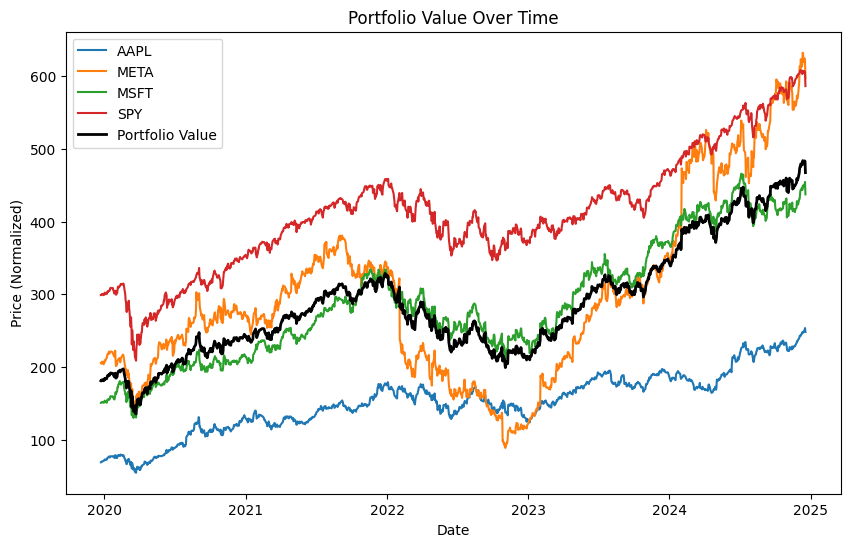

In [33]:
full_portfolio_prices = portfolio_value_evaluation(stock_names, weights, start_date, end_date)

In [34]:
full_portfolio_prices.tail()

Ticker,AAPL,META,MSFT,SPY,Ptf Value
Date,,,,,
2024-12-12,247.960007,630.281555,449.559998,604.330017,483.032894
2024-12-13,248.130005,619.849976,447.269989,604.210022,479.864998
2024-12-16,251.039993,624.239990,451.589996,606.789978,483.414989
2024-12-17,253.479996,619.440002,454.459991,604.289978,482.917492
2024-12-18,248.050003,597.190002,437.390015,586.280029,467.227512


In [35]:
total_return = (full_portfolio_prices['Ptf Value'][-1] / full_portfolio_prices['Ptf Value'][0])-1
print("Total portfolio return:", f"{total_return:.2%}")

Total portfolio return: 158.28%
